# [Symbolic Format: MIDI](https://www.audiolabs-erlangen.de/resources/MIR/FMP/C1/C1S2_MIDI.html)

In [13]:
import os,sys
from matplotlib import pyplot as plt
from matplotlib import patches
from matplotlib import colors

import pandas as pd
import IPython.display as ipd

sys.path.append('./FMP')
import libfmp.c1

In [14]:
# PrettyMIDI
import pretty_midi

fn = 'FMP/data/C1/FMP_C1_F13a_Beethoven_FateMotive_Sibelius-Tracks.mid'

midi_data = pretty_midi.PrettyMIDI(fn)
midi_list =[]

for instrument in midi_data.instruments:
    for note in instrument.notes:
        start = note.start
        end = note.end
        pitch = note.pitch
        velocity = note.velocity
        midi_list.append([start, end, pitch, velocity, instrument.name])

# sort by start and pitch
midi_list = sorted(midi_list, key=lambda x: (x[0], x[2]))

df = pd.DataFrame(midi_list, columns=[
                  'Start', 'End', 'Pitch', 'Velocity', 'Instrument'])
html = df.to_html(index=False)
ipd.HTML(html)


Start,End,Pitch,Velocity,Instrument
0.25,0.50,43,113,Piano
0.25,0.50,55,76,Piano
0.25,0.50,67,76,Piano
0.50,0.75,43,113,Piano
0.50,0.75,55,76,Piano
0.50,0.75,67,76,Piano
0.75,1.00,43,113,Piano
0.75,1.00,55,76,Piano
0.75,1.00,67,76,Piano
1.00,2.00,39,126,Piano


In [10]:
Fs = 22050
audio_data = midi_data.synthesize(fs=Fs)
ipd.Audio(audio_data, rate=Fs)

(<Figure size 576x216 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fae93071750>)

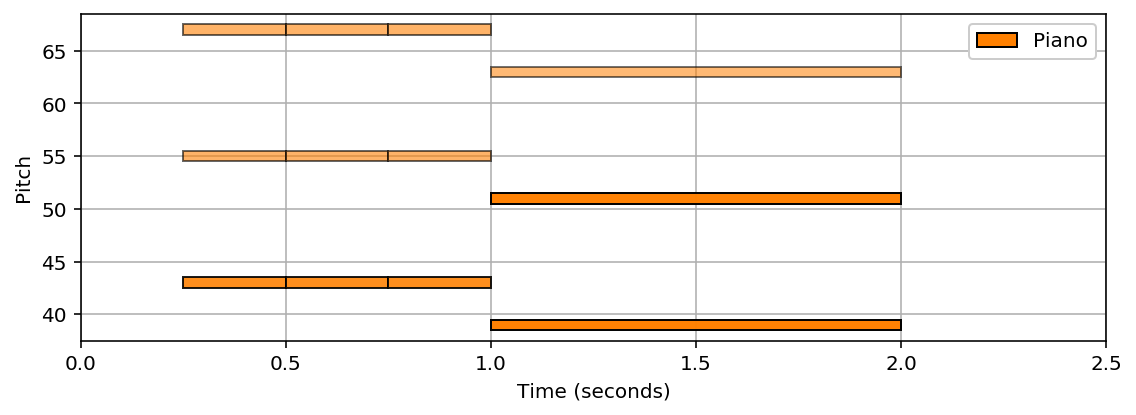

In [11]:
def midi_to_list(midi):
    midi_data = midi
    score = []
    for instrument in midi_data.instruments:
        for note in instrument.notes:
            start = note.start
            duration = note.end - start
            pitch = note.pitch
            velocity = note.velocity /128
            score.append([start, duration, pitch, velocity, instrument.name])
    
    return score

score = midi_to_list(midi_data)
libfmp.c1.visualize_piano_roll(score, figsize=(8, 3), velocity_alpha=True)


In [12]:
# Cobversion from MIDI to CSV
df.to_csv('./midi2csv.csv', sep=';', quoting=2, float_format='%.3f', index=False)

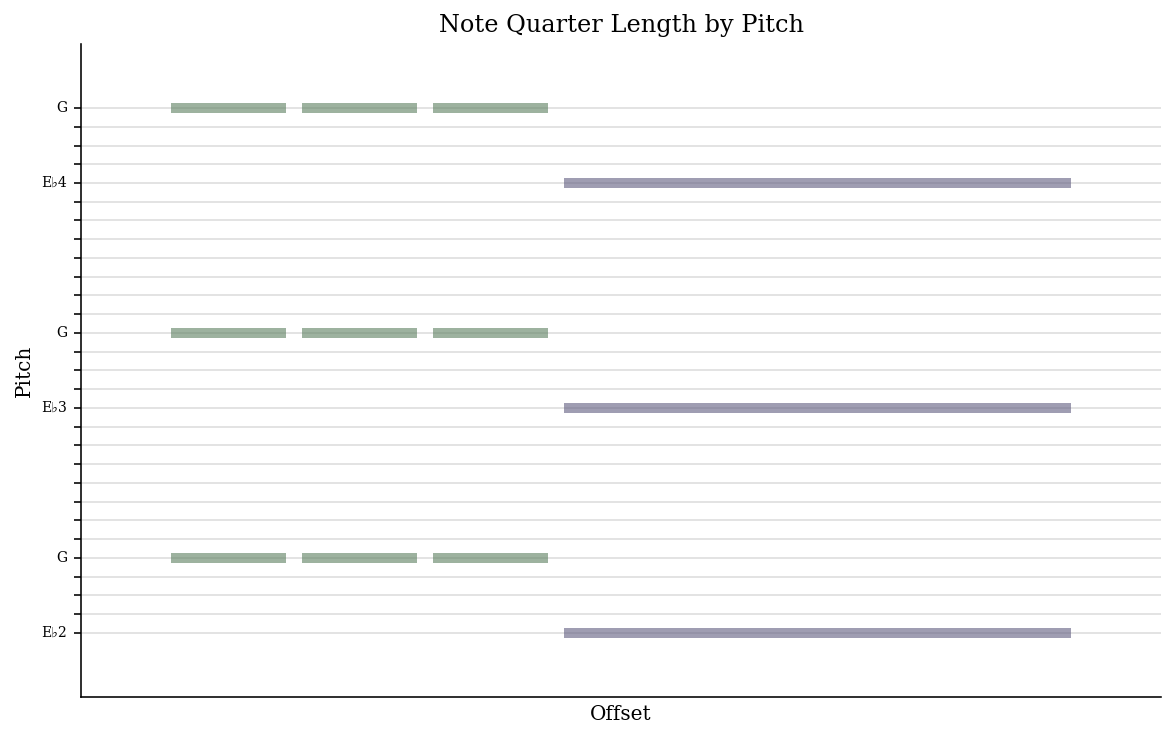

In [15]:
# music21

import music21 as m21

fn = 'FMP/data/C1/FMP_C1_F13a_Beethoven_FateMotive_Sibelius-Tracks.mid'

s = m21.converter.parse(fn)
s.plot('pianoroll', figsize=(10,3))


Multitrack(name=None, resolution=24, tempo=array(shape=(96, 1), dtype=float64), downbeat=array(shape=(96, 1), dtype=bool), tracks=[StandardTrack(name='Piano', program=0, is_drum=False, pianoroll=array(shape=(96, 128), dtype=uint8)), StandardTrack(name='Piano', program=0, is_drum=False, pianoroll=array(shape=(96, 128), dtype=uint8))])


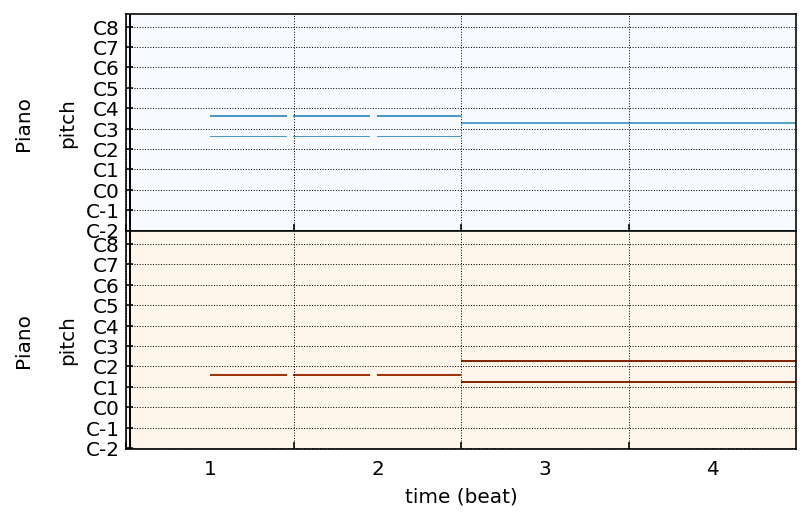

In [20]:
# pypianoroll
# https://salu133445.github.io/pypianoroll/index.html
# pip install ptpianoroll

import pypianoroll as pl

fn = 'FMP/data/C1/FMP_C1_F13a_Beethoven_FateMotive_Sibelius-Tracks.mid'
midi_data = pl.read(fn)
print(midi_data)
midi_data.plot()
